<a href="https://colab.research.google.com/github/USIS007420/PROGRA-III/blob/main/ModasIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTRENAR IA PARA RECONOCER PRENDAS DE ROPA**

ROBERTO CARLOS HERNANDEZ MELENDEZ USIS016520

JOSE ROBERTO DEL RIO MARAVILLA USIS015220

DUMA ROBERTO ZELAYA MEJIA USIS007420

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5MPZ47/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5MPZ47/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [3]:
tags = ["Camiseta/top", "Pantalón", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"]

In [4]:
ejemplo_entrenamiento = metadata.splits["train"].num_examples
ejemplo_prueba = metadata.splits["test"].num_examples
print(ejemplo_entrenamiento, ejemplo_prueba)

60000 10000


In [5]:
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # 150/255=0.588
  return images, labels

In [6]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [7]:
modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)), 
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu), 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
       
])

In [8]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [9]:
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(ejemplo_prueba).batch(batchsize)

In [31]:
modelo.fit(datos_entrenamiento, epochs=10, 
           steps_per_epoch=math.ceil(ejemplo_entrenamiento/batchsize))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2125 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2053 - accuracy: 0.9223
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2042 - accuracy: 0.9233
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1988 - accuracy: 0.9250
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1915 - accuracy: 0.9268
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1860 - accuracy: 0.9288
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1868 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1825 - accuracy: 0.9302
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1804 - accuracy: 0.9314
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.174

In [32]:
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3765 - accuracy: 0.8910
Resultado de las pruebas 0.37645700573921204 0.8909744620323181


In [33]:
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(tags[predicted_label]), color=color)

In [34]:
for imagen_prueba, etiqueta_prueba in datos_prueba.take(1):
  imagen_prueba = imagen_prueba.numpy()
  etiqueta_prueba = etiqueta_prueba.numpy()
  predicciones = modelo.predict(imagen_prueba)

In [35]:
def graficar_valores_matriz(i, matriz_prediccion, etiqueta_verdadera):
  matriz_prediccion, etiqueta_verdadera = matriz_prediccion[i], etiqueta_verdadera[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), matriz_prediccion, color="#888888")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(matriz_prediccion)

  thisplot[etiqueta_prediccion].set_color("red")
  thisplot[etiqueta_verdadera].set_color("green")

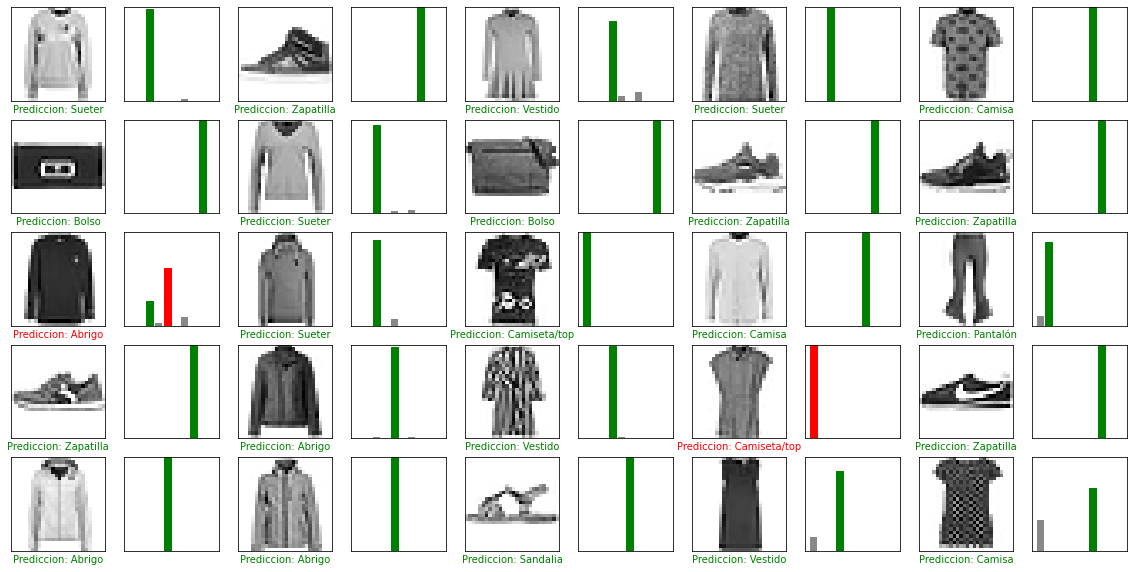

In [53]:
numfilas = 5
numcols = 5
numimgs = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimgs):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiqueta_prueba, imagen_prueba)

  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matriz(i, predicciones, etiqueta_prueba)

plt.show()

In [74]:
#Prueba con imagenes
#Jose Roberto Del Rio Maravilla USIS015220
#Roberto Carlos Hernandez Melendez USIS016520
#Duma Roberto Zelaya Mejia USIS007420

import cv2

pruebaImg = cv2.imread('/content/Pantalon.jpg', 0)
pruebaImg = tf.cast(pruebaImg, tf.float32)
pruebaImg = pruebaImg / 255
pruebaImg = np.expand_dims(pruebaImg, axis=0)

prdPrueba = modelo.predict(pruebaImg, batch_size=1)
tagLocalTest = np.argmax(prdPrueba)

print(pruebaImg.shape)



(1, 28, 28)


Text(0.5, 0, 'Prediccion: Pantalón')

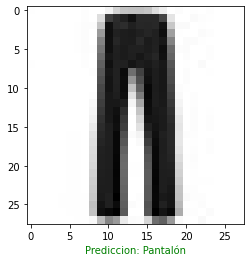

In [75]:
img = pruebaImg 
plt.grid(False)
plt.imshow(img[0,...], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(tags[tagLocalTest]), color="green")